In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


In [7]:
# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False

In [8]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.getcwd()

# rep_FI_path=os.path.join(Helperfile_folder, "Leilani_repeated_names.xlsx") #r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Helper_files\Leilaini_repeated_names.xlsx"

#Folder to save figures

figpath=MasterFolder +slash+'Figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

#Folder to save full datasets

compilation_folder=MasterFolder +slash+'Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

In [9]:
crystals=pd.read_excel(compilation_folder+'/'+"KAM_crystals_averaged_spots.xlsx")
crystals = crystals.loc[:, ~crystals.columns.str.contains('^Unnamed')]
crystals = crystals[~(crystals['Sample'].str.contains("AMG"))&(crystals['Inclusion type'].str.contains('MI'))]
crystals.head()

,Sample Name_x,Name_Full_xtal,Sample,Sample_crystal,Inclusion type,Predict_Mineral,Al2O3,CaO,Cr2O3,FeOt,...,Oxide % Sigma_CaO,Oxide % Sigma_Cr2O3,Oxide % Sigma_FeOt,Oxide % Sigma_MgO,Oxide % Sigma_MnO,Oxide % Sigma_Na2O,Oxide % Sigma_NiO,Oxide % Sigma_SiO2,Oxide % Sigma_TiO2,spot averaged?
132,KA611_c207_MIA_ol1_WDS,KA611_c207_MIA,KA611,KA611_c207,MI,Olivine,NaN,0.455533,0.025233,14.500233,...,0.011233,0.014600,0.043400,0.056667,0.015867,NaN,0.012200,0.062433,NaN,Yes
133,KA611_c208_MIA_ol1_WDS,KA611_c208_MIA,KA611,KA611_c208,MI,Olivine,NaN,0.421867,0.045000,13.715467,...,0.011100,0.014533,0.042333,0.056733,0.015767,NaN,0.016367,0.062500,NaN,Yes
134,KA611_c209_MIA_ol1_WDS,KA611_c209_MIA,KA611,KA611_c209,MI,Olivine,NaN,0.455000,0.032833,13.134367,...,0.011200,0.014633,0.041667,0.056767,0.015733,NaN,0.016367,0.062500,NaN,Yes
135,KA611_c210_MIB_ol1_WDS,KA611_c210_MIB,KA611,KA611_c210,MI,Olivine,NaN,0.410333,0.051067,13.352533,...,0.011100,0.014633,0.041933,0.056633,0.015700,NaN,0.016400,0.062367,NaN,Yes
136,KA611_c212_MIA_ol1_WDS,KA611_c212_MIA,KA611,KA611_c212,MI,Olivine,NaN,0.421350,0.043550,12.949325,...,0.011050,0.014600,0.041350,0.056700,0.015625,NaN,0.017450,0.062500,NaN,Yes


In [10]:
EDS_MI=pd.read_excel(compilation_folder+'/'+"KAM_MI_glasses_averaged_spots.xlsx",sheet_name="Sheet1")

EDS_MI = EDS_MI.loc[:, ~EDS_MI.columns.str.contains('^Unnamed')]
EDS_MI = EDS_MI[~EDS_MI['Sample'].str.contains("AMG")]

EDS_MI.columns = [col + '_migl' for col in EDS_MI.columns] 

EDS_MI.head()

,Sample Name_x_migl,Name_Full_gl_migl,Sample_migl,Al2O3_migl,CaO_migl,Cl_migl,Cr2O3_migl,FeOt_migl,K2O_migl,MgO_migl,...,Oxide % Sigma_K2O_migl,Oxide % Sigma_MgO_migl,Oxide % Sigma_MnO_migl,Oxide % Sigma_Na2O_migl,Oxide % Sigma_NiO_migl,Oxide % Sigma_P2O5_migl,Oxide % Sigma_SO3_migl,Oxide % Sigma_SiO2_migl,Oxide % Sigma_TiO2_migl,spot averaged?_migl
0,KA611_c207_MIA_r2,KA611_c207_MIA,KA611,12.7107,9.637000,NaN,0.02940,10.536400,0.875200,9.30710,...,0.01530,0.04350,0.0222,0.03520,NaN,0.027300,0.027300,0.089900,0.028000,No
1,KA611_c208_MIA_r1,KA611_c208_MIA,KA611,12.9723,13.060475,NaN,0.05135,11.289125,0.724400,8.27505,...,0.01415,0.04010,0.0216,0.03200,NaN,0.025100,0.021875,0.085300,0.028550,Yes
2,KA611_c209_MIA_r2_WDS,KA611_c209_MIA,KA611,13.6863,13.159400,NaN,0.07110,10.169900,0.990500,8.25670,...,0.01570,0.04180,0.0224,0.03410,NaN,0.026800,0.009300,0.089000,0.030800,No
3,KA611_c210_MIB_r1,KA611_c210_MIB,KA611,13.2204,12.218250,NaN,0.04400,10.750700,1.670200,6.06770,...,0.01620,0.03435,0.0205,0.03265,NaN,0.027550,0.020650,0.080550,0.027700,Yes
4,KA611_c212_MIA_r1,KA611_c212_MIA,KA611,12.9734,12.920433,NaN,0.06210,10.527500,0.633867,8.40770,...,0.01360,0.03960,0.0211,0.03260,0.0276,0.025133,0.021433,0.084067,0.028733,Yes


In [11]:
crystals_wglasses=pd.merge(left=crystals,left_on='Name_Full_xtal',right=EDS_MI,right_on='Name_Full_gl_migl',how='left',suffixes=(None,"_migl"))
crystals_wglasses=crystals_wglasses.dropna(axis=1, how='all')
crystals_wglasses.head()

,Sample Name_x,Name_Full_xtal,Sample,Sample_crystal,Inclusion type,Predict_Mineral,CaO,Cr2O3,FeOt,MgO,...,Oxide % Sigma_K2O_migl,Oxide % Sigma_MgO_migl,Oxide % Sigma_MnO_migl,Oxide % Sigma_Na2O_migl,Oxide % Sigma_NiO_migl,Oxide % Sigma_P2O5_migl,Oxide % Sigma_SO3_migl,Oxide % Sigma_SiO2_migl,Oxide % Sigma_TiO2_migl,spot averaged?_migl
0,KA611_c207_MIA_ol1_WDS,KA611_c207_MIA,KA611,KA611_c207,MI,Olivine,0.455533,0.025233,14.500233,44.588500,...,0.01530,0.04350,0.0222,0.03520,NaN,0.027300,0.027300,0.089900,0.028000,No
1,KA611_c208_MIA_ol1_WDS,KA611_c208_MIA,KA611,KA611_c208,MI,Olivine,0.421867,0.045000,13.715467,45.157200,...,0.01415,0.04010,0.0216,0.03200,NaN,0.025100,0.021875,0.085300,0.028550,Yes
2,KA611_c209_MIA_ol1_WDS,KA611_c209_MIA,KA611,KA611_c209,MI,Olivine,0.455000,0.032833,13.134367,45.551900,...,0.01570,0.04180,0.0224,0.03410,NaN,0.026800,0.009300,0.089000,0.030800,No
3,KA611_c210_MIB_ol1_WDS,KA611_c210_MIB,KA611,KA611_c210,MI,Olivine,0.410333,0.051067,13.352533,45.216767,...,0.01620,0.03435,0.0205,0.03265,NaN,0.027550,0.020650,0.080550,0.027700,Yes
4,KA611_c212_MIA_ol1_WDS,KA611_c212_MIA,KA611,KA611_c212,MI,Olivine,0.421350,0.043550,12.949325,45.712950,...,0.01360,0.03960,0.0211,0.03260,0.0276,0.025133,0.021433,0.084067,0.028733,Yes


In [12]:
ols=crystals_wglasses[crystals_wglasses['Predict_Mineral'].str.contains("Olivine")]
# ols.columns = [col + '_Ol' for col in ols.columns] 

ols.head()

,Sample Name_x,Name_Full_xtal,Sample,Sample_crystal,Inclusion type,Predict_Mineral,CaO,Cr2O3,FeOt,MgO,...,Oxide % Sigma_K2O_migl,Oxide % Sigma_MgO_migl,Oxide % Sigma_MnO_migl,Oxide % Sigma_Na2O_migl,Oxide % Sigma_NiO_migl,Oxide % Sigma_P2O5_migl,Oxide % Sigma_SO3_migl,Oxide % Sigma_SiO2_migl,Oxide % Sigma_TiO2_migl,spot averaged?_migl
0,KA611_c207_MIA_ol1_WDS,KA611_c207_MIA,KA611,KA611_c207,MI,Olivine,0.455533,0.025233,14.500233,44.588500,...,0.01530,0.04350,0.0222,0.03520,NaN,0.027300,0.027300,0.089900,0.028000,No
1,KA611_c208_MIA_ol1_WDS,KA611_c208_MIA,KA611,KA611_c208,MI,Olivine,0.421867,0.045000,13.715467,45.157200,...,0.01415,0.04010,0.0216,0.03200,NaN,0.025100,0.021875,0.085300,0.028550,Yes
2,KA611_c209_MIA_ol1_WDS,KA611_c209_MIA,KA611,KA611_c209,MI,Olivine,0.455000,0.032833,13.134367,45.551900,...,0.01570,0.04180,0.0224,0.03410,NaN,0.026800,0.009300,0.089000,0.030800,No
3,KA611_c210_MIB_ol1_WDS,KA611_c210_MIB,KA611,KA611_c210,MI,Olivine,0.410333,0.051067,13.352533,45.216767,...,0.01620,0.03435,0.0205,0.03265,NaN,0.027550,0.020650,0.080550,0.027700,Yes
4,KA611_c212_MIA_ol1_WDS,KA611_c212_MIA,KA611,KA611_c212,MI,Olivine,0.421350,0.043550,12.949325,45.712950,...,0.01360,0.03960,0.0211,0.03260,0.0276,0.025133,0.021433,0.084067,0.028733,Yes


## Let's build a dataframe of the olvine-liquid pairs for thermobar

In [13]:
ols_liq_thermobar = pd.DataFrame(columns=['Sample Code',
    'Sample Name', 'Sample_ID_Liq', 'Sample_ID_Ol','Na2O_Liq', 'Al2O3_Liq', 'P2O5_Liq', 'CaO_Liq', 
    'K2O_Liq', 'TiO2_Liq', 'SiO2_Liq', 'MgO_Liq', 'FeOt_Liq', 'MnO_Liq', 
    'MgO_Ol', 'SiO2_Ol', 'FeOt_Ol', 'Al2O3_Ol', 'CaO_Ol', 'Cr2O3_Ol','TiO2_Ol','MnO_Ol', 'NiO_Ol',

], index=range(len(ols)))  # Same number of rows as ols

ka79_columns_map = {
    'Na2O_Liq': 'Na2O_migl',
    'Al2O3_Liq': 'Al2O3_migl',
    'P2O5_Liq': 'P2O5_migl',
    'CaO_Liq': 'CaO_migl',
    'K2O_Liq': 'K2O_migl',
    'TiO2_Liq': 'TiO2_migl',
    'SiO2_Liq': 'SiO2_migl',
    'MgO_Liq': 'MgO_migl',
    'FeOt_Liq': 'FeOt_migl',
    'MnO_Liq': 'MnO_migl',
    'MgO_Ol': 'MgO',
    'SiO2_Ol': 'SiO2',
    'FeOt_Ol': 'FeOt',
    'CaO_Ol': 'CaO',
    'Cr2O3_Ol':'Cr2O3',
    'MnO_Ol': 'MnO',
    'NiO_Ol': 'NiO'
}

other_columns_map = {
    'Na2O_Liq': 'Na2O_migl',
    'Al2O3_Liq': 'Al2O3_migl',
    'P2O5_Liq': 'P2O5_migl',
    'CaO_Liq': 'CaO_migl',
    'K2O_Liq': 'K2O_migl',
    'TiO2_Liq': 'TiO2_migl',
    'SiO2_Liq': 'SiO2_migl',
    'MgO_Liq': 'MgO_migl',
    'FeOt_Liq': 'FeOt_migl',
    'MnO_Liq': 'MnO_migl',
    'MgO_Ol': 'MgO',
    'SiO2_Ol': 'SiO2',
    'FeOt_Ol': 'FeOt',
    'CaO_Ol': 'CaO',
    'Cr2O3_Ol':'Cr2O3',
    'MnO_Ol': 'MnO',
    'NiO_Ol': 'NiO'
}

ols_liq_thermobar['Sample Code'] = ols['Sample'].values
ols_liq_thermobar['Sample Name'] = ols['Sample_crystal'].values
ols_liq_thermobar['Sample_ID_Liq'] = ols['Name_Full_xtal'].values
ols_liq_thermobar['Sample_ID_Ol'] = ols['Name_Full_xtal'].values

for thermobar_col, filtered_col in ka79_columns_map.items():
    ols_liq_thermobar.loc[ols_liq_thermobar['Sample Code'] == 'KA79', thermobar_col] = ols.loc[ols['Sample'] == 'KA79', filtered_col].values

for thermobar_col, filtered_col in other_columns_map.items():
    ols_liq_thermobar.loc[ols_liq_thermobar['Sample Code'] != 'KA79', thermobar_col] = ols.loc[ols['Sample'] != 'KA79', filtered_col].values


ols_liq_thermobar.to_excel(compilation_folder+'/'+"ols_MIliqs_thermobar.xlsx")
ols_liq_thermobar



,Sample Code,Sample Name,Sample_ID_Liq,Sample_ID_Ol,Na2O_Liq,Al2O3_Liq,P2O5_Liq,CaO_Liq,K2O_Liq,TiO2_Liq,...,MnO_Liq,MgO_Ol,SiO2_Ol,FeOt_Ol,Al2O3_Ol,CaO_Ol,Cr2O3_Ol,TiO2_Ol,MnO_Ol,NiO_Ol
0,KA611,KA611_c207,KA611_c207_MIA,KA611_c207_MIA,3.5848,12.7107,0.365,9.637,0.8752,1.6441,...,0.1497,44.5885,39.529067,14.500233,NaN,0.455533,0.025233,NaN,0.2253,0.280133
1,KA611,KA611_c208,KA611_c208_MIA,KA611_c208_MIA,2.860375,12.9723,0.18805,13.060475,0.7244,2.1028,...,0.187475,45.1572,39.607467,13.715467,NaN,0.421867,0.045,NaN,0.212833,0.302633
2,KA611,KA611_c209,KA611_c209_MIA,KA611_c209_MIA,3.0954,13.6863,0.2799,13.1594,0.9905,2.3965,...,0.137,45.5519,39.615967,13.134367,NaN,0.455,0.032833,NaN,0.2024,0.3138
3,KA611,KA611_c210,KA611_c210_MIB,KA611_c210_MIB,3.6227,13.2204,0.99425,12.21825,1.6702,2.2276,...,0.1447,45.216767,39.4568,13.352533,NaN,0.410333,0.051067,NaN,0.209767,0.319167
4,KA611,KA611_c212,KA611_c212_MIA,KA611_c212_MIA,3.305,12.9734,0.295367,12.920433,0.633867,2.337567,...,0.151267,45.71295,39.7435,12.949325,NaN,0.42135,0.04355,NaN,0.190575,0.3271
5,KA611,KA611_c212,KA611_c212_MIB,KA611_c212_MIB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,46.093433,40.1576,13.016933,NaN,0.423033,0.051,NaN,0.194833,0.327833
6,KA611,KA611_c213,KA611_c213_MIA,KA611_c213_MIA,2.5884,13.5142,0.212,12.2373,0.5326,3.3645,...,0.1617,45.2004,39.7981,13.8894,NaN,0.3301,0.1032,NaN,0.2066,0.3037
7,KA611,KA611_c213,KA611_c213_MIB,KA611_c213_MIB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.484833,40.033067,13.918467,NaN,0.3299,0.082167,NaN,0.197533,0.293067
8,KA611,KA611_c214,KA611_c214_MIA,KA611_c214_MIA,2.9136,15.3258,0.3147,14.2817,0.8501,2.8168,...,0.16,45.5013,39.855425,13.4667,NaN,0.3753,0.05125,NaN,0.189975,0.29675
9,KA611,KA611_c217,KA611_c217_MIA,KA611_c217_MIA,3.6253,13.8619,0.5234,12.6726,1.2868,2.299,...,0.1715,44.941467,39.593633,13.945167,NaN,0.4498,0.025667,NaN,0.2203,0.304467


## Now let's plot Rhodes diagrams for olivines and MI glasses

In [14]:
## First, use thermobar to calculate Mg# of glass and Fo of olivines

ol_liqs=pt.import_excel(compilation_folder+'/'+r"ols_MIliqs_thermobar.xlsx",
                         sheet_name='Sheet1')
all=ol_liqs['my_input']
MG_Liqs=ol_liqs['Liqs'] 
Ols=ol_liqs['Ols']

Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=MG_Liqs, Fe3Fet_Liq=0.2)

MG_Liqs['Mg#_liquid']=Liq_Mgno_calc.copy()

Ol_Fo_Calc=pt.calculate_ol_fo(ol_comps=Ols)
Ols['Fo_host']=Ol_Fo_Calc.copy()

## Merge the liquids and crystals for plotting as violins
Ols_4violins=pd.merge(left=Ols,right=MG_Liqs,left_on='Sample_ID_Ol', right_on='Sample_ID_Liq',how='left')

Ols_4violins['Sample'] = [sample.split("_")[0] for sample in Ols_4violins['Sample_ID_Liq']]
Ols_4violins['Inclusion type'] = ['MI' if '_c2' in sample else 'FI' for sample in Ols_4violins['Sample_ID_Liq']]
Ols_4violins['Total (wt%)_Ol'] = Ols_4violins.iloc[:, 0:11].sum(axis=1)
Ols_4violins.insert(0, 'Total (wt%)_Ol', Ols_4violins.pop('Total (wt%)_Ol'))
Ols_4violins['Total (wt%)_Liq'] = Ols_4violins.iloc[:, 14:25].sum(axis=1)
Ols_4violins.insert(25, 'Total (wt%)_Liq', Ols_4violins.pop('Total (wt%)_Liq'))

Ols_4violins = Ols_4violins[~(Ols_4violins['MgO_Liq']>20)&~(Ols_4violins['Sample_ID_Liq'].str.contains("KA79_c203b_MIC"))] ## this removes a couple bad spots. One that was so thin it hit olivine under and the other was at the very edge, too close to epoxy. 
Ols_4violins = Ols_4violins.dropna(subset=['Mg#_liquid'])

Ols_4violins.head()

,Total (wt%)_Ol,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,...,Total (wt%)_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,Mg#_liquid,Sample,Inclusion type
0,99.604000,39.529067,0.0,0.0,14.500233,0.225300,44.588500,0.455533,0.0,0.0,...,94.696600,0.0,0.0,0.0,0.0,0.0,KA611_c207_MIA,0.663096,KA611,MI
1,99.462467,39.607467,0.0,0.0,13.715467,0.212833,45.157200,0.421867,0.0,0.0,...,97.165925,0.0,0.0,0.0,0.0,0.0,KA611_c208_MIA,0.620244,KA611,MI
2,99.306267,39.615967,0.0,0.0,13.134367,0.202400,45.551900,0.455000,0.0,0.0,...,97.489300,0.0,0.0,0.0,0.0,0.0,KA611_c209_MIA,0.644001,KA611,MI
3,99.016433,39.456800,0.0,0.0,13.352533,0.209767,45.216767,0.410333,0.0,0.0,...,95.867600,0.0,0.0,0.0,0.0,0.0,KA611_c210_MIB,0.557048,KA611,MI
4,99.388350,39.743500,0.0,0.0,12.949325,0.190575,45.712950,0.421350,0.0,0.0,...,97.231533,0.0,0.0,0.0,0.0,0.0,KA611_c212_MIA,0.640224,KA611,MI


### Calculates the Rhodes lines

In [15]:
Rhodes=pt.calculate_ol_rhodes_diagram_lines(Min_Mgno=0.46, Max_Mgno=0.78)
Rhodes.head()

,Mg#_Liq,Eq_Ol_Fo_Roeder (Kd=0.3),Eq_Ol_Fo_Roeder (Kd=0.27),Eq_Ol_Fo_Roeder (Kd=0.33),Eq_Ol_Fo_Matzen (Kd=0.34),Eq_Ol_Fo_Matzen (Kd=0.328),Eq_Ol_Fo_Matzen (Kd=0.352),Eq_Ol_Fo_Shea (Kd=0.335),Eq_Ol_Fo_Shea (Kd=0.345),Eq_Ol_Fo_Shea (Kd=0.325)
0,0.460000,0.739550,0.759327,0.720777,0.714730,0.721999,0.707605,0.717741,0.711744,0.723839
1,0.463232,0.742047,0.761695,0.723387,0.717374,0.724602,0.710289,0.720368,0.714405,0.726432
2,0.466465,0.744526,0.764046,0.725980,0.720001,0.727187,0.712955,0.722978,0.717048,0.729006
3,0.469697,0.746988,0.766378,0.728555,0.722611,0.729755,0.715605,0.725571,0.719675,0.731563
4,0.472929,0.749432,0.768693,0.731112,0.725203,0.732306,0.718237,0.728146,0.722285,0.734103


### Now plot the violins for olivine-matrix glasses

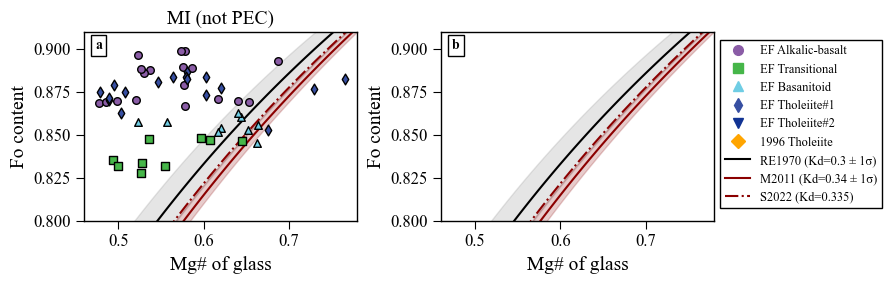

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(9,3))

bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')


color_dict = {
    "KA71": {'color': '#8A5CA6', 'marker': 'o'},  
    "KA69": {'color': '#46B649', 'marker': 's'},  
    "KA611": {'color': '#6FCDE4', 'marker': '^'},  
    "KA79": {'color': '#374FA2', 'marker': 'd'},  
    "KA78": {'color': '#113393', 'marker': 'v'},  
    "KA961": {'color': 'orange', 'marker': 'D'}   
}


label_dict = {
    "KA71": "EF Alkalic-basalt",
    "KA69": "EF Transitional",
    "KA611": "EF Basanitoid",
    "KA79": "EF Tholeiite#1",
    "KA78": "EF Tholeiite#2",
    "KA961": "1996 Tholeiite"

}


## Panel a (MI uncorrected)

# Panel a (MI uncorrected)
A_panel_df = Ols_4violins[Ols_4violins['Inclusion type'] == 'MI']

for rock_type, color_info in color_dict.items():
    rock_data = A_panel_df[A_panel_df['Sample'] == rock_type]
    colors = color_info['color']
    markers = color_info['marker']
    
    # Scatter plot with the updated color and marker style
    axs[0].scatter(rock_data['Mg#_liquid'], rock_data['Fo_host'], marker=markers, s=30,edgecolor='k', color=colors)

# ## Panel b (MI PEC corrected)

# B_panel_df=Ols_4violins[Ols_4violins['Inclusion type']=='MI']


## Add the Rhodes lines to the plot ##

axs[0].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k',zorder=-1)

axs[0].fill_between(Rhodes['Mg#_Liq'],
                    Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], 
                    Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], 
                    color='grey', alpha=0.2, zorder=-2, label='Roeder 0.27-0.33')  # Adjust alpha for transparency

axs[0].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-',color='darkred',zorder=-1)
axs[0].fill_between(Rhodes['Mg#_Liq'],
                    Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], 
                    Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], 
                    color='darkred', alpha=0.2, zorder=-2, label='Matzen 0.328 -0.352')  # Adjust alpha for transparency

axs[0].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Shea (Kd=0.325)'], '-.',color='darkred',zorder=-1)

axs[1].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k',zorder=-1)

axs[1].fill_between(Rhodes['Mg#_Liq'],
                    Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], 
                    Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], 
                    color='grey', alpha=0.2, zorder=-2, label='Roeder 0.27-0.33')  # Adjust alpha for transparency

axs[1].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-',color='darkred',zorder=-1)
axs[1].fill_between(Rhodes['Mg#_Liq'],
                    Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], 
                    Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], 
                    color='darkred', alpha=0.2, zorder=-2, label='Matzen 0.328 -0.352')  # Adjust alpha for transparency

axs[1].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Shea (Kd=0.325)'], '-.',color='darkred',zorder=-1)

## Now let's construct the legend items and plot the legend

legend_handles = []
legend_labels = []

for rock_type, color_info in color_dict.items():
    # Create a Line2D object for each marker and color
    marker_handle = mlines.Line2D([], [], color=color_info['color'], marker=color_info['marker'], 
                                  markersize=7, linestyle='None')  # No line, just marker
    legend_handles.append(marker_handle)
    legend_labels.append(rock_type)

# Add the Rhodes lines to the legend
line_handle_1 = mlines.Line2D([], [], color='black', linestyle='-')
line_handle_2 = mlines.Line2D([], [], color='darkred', linestyle='-')
line_handle_3 = mlines.Line2D([], [], color='darkred', linestyle='-.')

# Extend the legend with these lines
legend_handles.extend([line_handle_1, line_handle_2, line_handle_3])

# Map the rock type codes to their full labels
legend_labels_updated = [label_dict.get(code, 'Unknown') for code in legend_labels]
legend_labels_updated.extend(['RE1970 (Kd=0.3 ± 1σ)', 'M2011 (Kd=0.34 ± 1σ)', 'S2022 (Kd=0.335)'])

# Plot the legend
axs[1].legend(handles=legend_handles, labels=legend_labels_updated, 
              loc='upper left', framealpha=1, edgecolor='black', fontsize=9, 
              ncol=1, bbox_to_anchor=(1, 0.99))

# Additional modifications
###### This part is common to both plots #####

pos=(0.04,0.91)

axs[0].text(pos[0], pos[1], 'a', transform=axs[0].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[1].text(pos[0], pos[1], 'b', transform=axs[1].transAxes, fontsize=10, fontweight='bold', bbox=bbox)

axs[0].set_ylabel('Fo content')
axs[1].set_ylabel('Fo content')

axs[0].set_xlabel('Mg# of glass')
axs[1].set_xlabel('Mg# of glass')

axs[0].set_ylim([0.8,0.91])
axs[0].set_xlim([0.46,0.78])
axs[1].set_ylim([0.8,0.91])
axs[1].set_xlim([0.46,0.78])

axs[0].set_title('MI (not PEC)')
# axs[1].set_title('MI host olivines')

fig.tight_layout()

fig.savefig(figpath+slash+'Rhodes_ol_MI.pdf', format='pdf', dpi=300, transparent=True)

In [18]:
Ols_4violins.to_excel(compilation_folder+'/'+"KAM_MIglasses&olivines.xlsx")